## Observations and Insights 

1) There was a toal of 249 mice tested.
2) The majority of the mice were given the drug Ramicane.
3) 50.7% of the mice were male.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

display(mouse_metadata, study_results)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(pd.unique(data_combined["Mouse ID"])) 


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.

mice_group = data_combined.groupby(["Mouse ID", "Timepoint"])
mice_group.count().head()

duplicate_mouse = data_combined.loc[data_combined.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unduplicated_mice = data_combined.drop_duplicates(subset=["Mouse ID", "Timepoint"])
unduplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(unduplicated_mice["Mouse ID"]))

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

unduplicated_mice_group = unduplicated_mice.groupby(["Drug Regimen"])
    
tumor_mean = unduplicated_mice_group["Tumor Volume (mm3)"].mean()

tumor_median = unduplicated_mice_group["Tumor Volume (mm3)"].median()

tumor_variance = unduplicated_mice_group["Tumor Volume (mm3)"].var()

tumor_stdev = unduplicated_mice_group["Tumor Volume (mm3)"].std()

tumor_SEM = unduplicated_mice_group["Tumor Volume (mm3)"].sem()


unduplicated_mice_summary = pd.DataFrame({
    "Mean":tumor_mean,
    "Median":tumor_median,
    "Variance":tumor_variance,
    "Std. Dev":tumor_stdev,
    "SEM":tumor_SEM})

unduplicated_mice_summary

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

unduplicated_mice_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

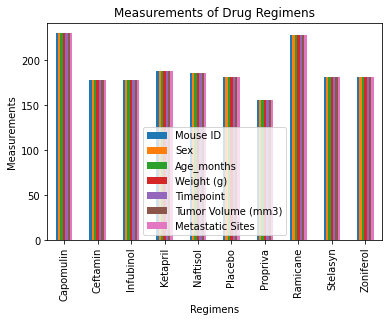

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df = unduplicated_mice["Drug Regimen"].unique()

regimen_df
regimen_count = unduplicated_mice.groupby(["Drug Regimen"]).count()

regimen_count.plot(kind="bar", title = "Measurements of Drug Regimens")
plt.xlabel("Regimens")
plt.ylabel("Measurements")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

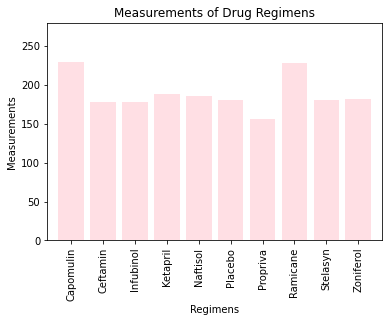

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimen_df = unduplicated_mice["Drug Regimen"].unique()

regimen_df
regimen_count = unduplicated_mice.groupby(["Drug Regimen"]).count()
regimen_count

measurements = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(x_axis, measurements, color = "pink", alpha = 0.5, align = "center")
plt.title("Measurements of Drug Regimens")
plt.xlabel("Regimens")
plt.ylabel("Measurements")
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(measurements) + 50)
plt.xticks(rotation=90)

Text(0, 0.5, 'Count')

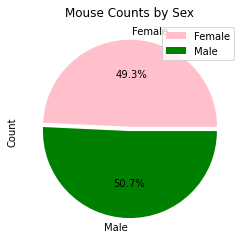

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                  # 'radius': [2439.7, 6051.8, 6378.1]},
                  #index=['Mercury', 'Venus', 'Earth'])
#plot = df.plot.pie(y='mass', figsize=(5, 5))


mice_sex = unduplicated_mice.groupby(["Sex"]).count()
explode = (0.05, 0)
mice_sex.plot(kind="pie", y="Mouse ID", title=("Mouse Counts by Sex"), colors=["pink", "green"], autopct = "%1.1f%%", explode=explode)
plt.ylabel("Count")


<function matplotlib.pyplot.show(close=None, block=None)>

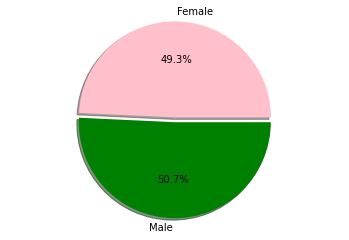

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = unduplicated_mice.groupby(["Sex"]).count()
mice_sex

labels = ["Female", "Male"]
count = [930, 958]
colors = ["pink", "green"]
explode = (0.05, 0)
plt.pie(count, explode=explode, labels=labels, autopct = "%1.1f%%", colors=colors, shadow=True, startangle=0)
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = unduplicated_mice.groupby("Mouse ID") ["Timepoint"].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_merge = pd.merge(max_timepoint, unduplicated_mice, on=["Mouse ID", "Timepoint"], how="left")
timepoint_merge
              

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Capomulin"]
ramicane = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Ramicane"]   
infubinol = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Infubinol"]
ceftamin = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Ceftamin"]



    # add subset 
capomulin_vol = capomulin["Tumor Volume (mm3)"]
ramicane_vol = ramicane["Tumor Volume (mm3)"]
infubinol_vol = infubinol["Tumor Volume (mm3)"]
ceftamin = ceftamin["Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
cap_quartiles = capomulin_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq  
    
print(f"The lower quarter of Capomulin Tumor Volume (mm3) is {cap_lowerq}.")    
print(f"The upper quarter of Capomulin Tumor Volume (mm3) is {cap_upperq}.")        
print(f"The interquartile range of Capomulin Tumor Volume (mm3) is {cap_iqr}.")     
print(f"The median for Capomulin Tumor Volume (mm3) is {cap_quartiles[0.5]}.")    
print()   

ram_quartiles = ramicane_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq  
    
print(f"The lower quarter of Ramicane Tumor Volume (mm3) is {ram_lowerq}.")    
print(f"The upper quarter of Ramicane Tumor Volume (mm3) is {ram_upperq}.")        
print(f"The interquartile range of Ramicane Tumor Volume (mm3) is {ram_iqr}.")     
print(f"The median for Ramicane Tumor Volume (mm3) is {ram_quartiles[0.5]}.")   
print()

inf_quartiles = infubinol_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-cap_lowerq  
    
print(f"The lower quarter of Infubinol Tumor Volume (mm3) is {inf_lowerq}.")    
print(f"The upper quarter of Infubinol Tumor Volume (mm3) is {inf_upperq}.")        
print(f"The interquartile range of Infubinol Tumor Volume (mm3) is {inf_iqr}.")     
print(f"The median for Infubinol Tumor Volume (mm3) is {inf_quartiles[0.5]}.")   
print()

The lower quarter of Capomulin Tumor Volume (mm3) is 32.37735684.
The upper quarter of Capomulin Tumor Volume (mm3) is 40.1592203.
The interquartile range of Capomulin Tumor Volume (mm3) is 7.781863460000004.
The median for Capomulin Tumor Volume (mm3) is 38.125164399999996.

The lower quarter of Ramicane Tumor Volume (mm3) is 31.56046955.
The upper quarter of Ramicane Tumor Volume (mm3) is 40.65900627.
The interquartile range of Ramicane Tumor Volume (mm3) is 9.098536719999998.
The median for Ramicane Tumor Volume (mm3) is 36.56165229.

The lower quarter of Infubinol Tumor Volume (mm3) is 54.04860769.
The upper quarter of Infubinol Tumor Volume (mm3) is 65.52574285.
The interquartile range of Infubinol Tumor Volume (mm3) is 33.14838601.
The median for Infubinol Tumor Volume (mm3) is 60.16518046.



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes of Mice per Regimens")
ax1.set_ylabel("Final Tumor Volumes")
ax1.boxplot(capulin_vol)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
